In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3.1. Dataset Preprocessing

## Understanding the Dataset

In [2]:
# Read the dataset
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0,33.6,0.627,50,1
1,1,85,66,29.0,0,26.6,0.351,31,0
2,8,183,64,0.0,0,23.3,0.672,32,1
3,1,89,66,23.0,94,28.1,0.167,21,0
4,0,137,40,35.0,168,43.1,2.288,33,1


In [3]:
print('number of samples in the dataset',dataset.shape[0])
print('number of features in the dataset',dataset.shape[1]-1)

number of samples in the dataset 768
number of features in the dataset 8


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             762 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       763 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


## Handling missing values in the dataset
Missing values represent incomplete information in a dataset. Removing null values ensures that the dataset is complete and ready for analysis or modeling. It prevents errors in machine learning models, which typically cannot handle missing data. There are various techniques to handle missing values in a dataset:


1.   Deleting rows with missing values
2.   Imputation techniques: Replacing the missong value with the mean, mode or median of the non-missing values in the respective feature.

choose one of the above methods to handle missing values in the dataset.



In [5]:
# TODO: Print the count of null values in each column
print("Count of null values in each column before removing:", dataset.isnull().sum())


# TODO: Implement a method to remove rows with null values


for column in dataset.columns:
    value = dataset[column].mean()
    dataset[column].fillna(value, inplace=True)
# Step 2: Verify that null values have been removed by printing the count again
print("\nCount of null values in each column after removing:", dataset.isnull().sum())


Count of null values in each column before removing: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               6
Insulin                     0
BMI                         5
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Count of null values in each column after removing: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\monster\AppData\Local\Temp\ipykernel_20344\3482469717.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(value, inplace=True)


## Handling outliers in the dataset
An outlier is a data point that differs significantly from the majority of other points in a dataset. It is an unusually high or low value. In Particular,The SVM algorith is sensitive to outliers.The sensitivity of SVM to outliers stems from its reliance on support vectors to define the optimal hyperplane. Thus, outliers can substantially skew the positioning of the hyperplane. there are various methods to handle outliers. In this exercise, we want to first utilize box-plot based methods to visualize the data and identify the outliers. Then we will use IQR to remove the outliers. in the following paragraphs, we will explain these methods in detail.




**Understanding the Boxplot structure:**
A boxplot summarizes the distribution of data by showing the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum values. It provides a clear visualization of the spread and skewness of the data, and any points lying outside the “whiskers” are considered potential outliers.


Lets display the boxplots for features in the dataset and identify the outliers:

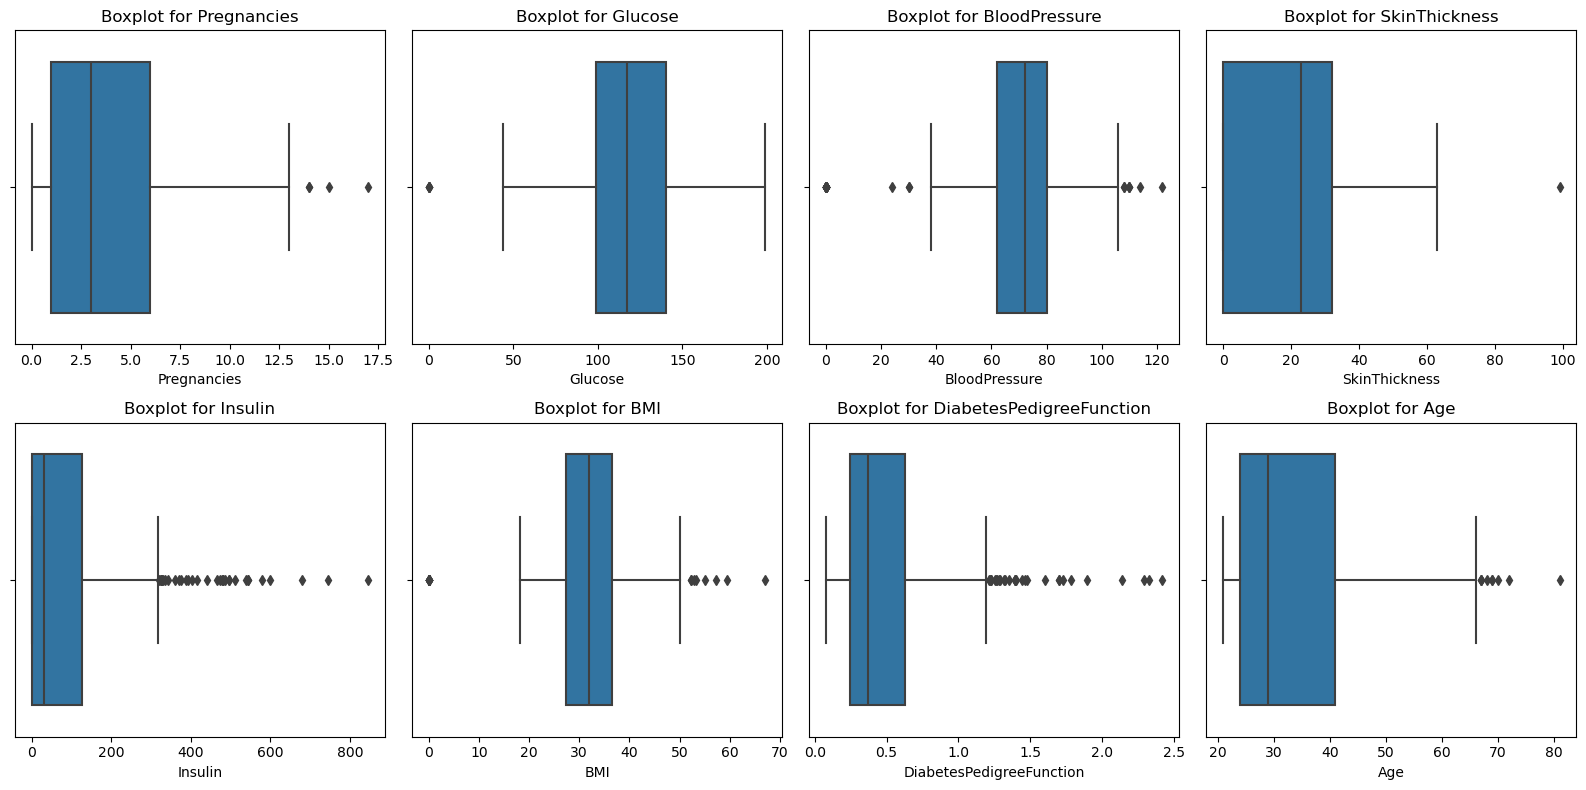

In [6]:
X = dataset.iloc[:,:-1]

# Set up the subplot grid (4 columns, 2 rows)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Plot a boxplot for each feature in the dataset (excluding the last column)
for i, column in enumerate(X.columns):
    sns.boxplot(x=X[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

# Adjust layout
plt.tight_layout()
plt.show()

This is how we can remove the outliers:
first  

1.   calculate the Q1 (25th percentile) and Q3 (75th percentile) for each column.
2.   compute the Interquartile Range (IQR). IQR (Interquartile Range) is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of a dataset, representing the range where the middle 50% of the data lies.

3.   Using the IQR, define lower and upper bounds beyond which data points are considered outliers.





In [7]:
# TODO: Calculate Q1 and Q2 for each column
for column in dataset.columns:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
# TODO: Calculate the lower and upper bounds for each column
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

# TODO: Keep only rows where all columns are within bounds
    dataset = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]
    
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 636 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               636 non-null    int64  
 1   Glucose                   636 non-null    int64  
 2   BloodPressure             636 non-null    int64  
 3   SkinThickness             636 non-null    float64
 4   Insulin                   636 non-null    int64  
 5   BMI                       636 non-null    float64
 6   DiabetesPedigreeFunction  636 non-null    float64
 7   Age                       636 non-null    int64  
 8   Outcome                   636 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 49.7 KB


## Standardization
Standardize the features values to have a mean of zero and standard deviation of 1. This ensures that all features contribute equally to the model

In [8]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_standardized = scaler.fit_transform(X)

# TODO: Standardize feature values:


## Split the data into train and test

In [10]:
from sklearn.model_selection import train_test_split

# TODO: Split the dataset into training and testing sets.
# Use 80% of the data for training and 20% for testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [15]:
X_train.info()
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508 entries, 118 to 394
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               508 non-null    int64  
 1   Glucose                   508 non-null    int64  
 2   BloodPressure             508 non-null    int64  
 3   SkinThickness             508 non-null    float64
 4   Insulin                   508 non-null    int64  
 5   BMI                       508 non-null    float64
 6   DiabetesPedigreeFunction  508 non-null    float64
 7   Age                       508 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 35.7 KB
<class 'pandas.core.series.Series'>
Index: 508 entries, 118 to 394
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
508 non-null    int64
dtypes: int64(1)
memory usage: 7.9 KB


# 3.2. Train a linear svm and report its accuracy

In [16]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#TODO: Fit a linear svm on train data
model = svm.SVC(kernel='linear')

model.fit(X_train, Y_train)
# TODO: Report the Accuracy on Train data
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
# TODO: Report the Accuracy on Test data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print("Training Accuracy:", train_accuracy)

test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.7854330708661418
Testing Accuracy: 0.8125


# 3.3. Use nonlinear kernels and report model accuracy


In [17]:
#TODO: Fit a linear svm on train data
model = svm.SVC(kernel='poly')

model.fit(X_train, Y_train)
# TODO: Report the Accuracy on Train data
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
# TODO: Report the Accuracy on Test data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print("Training Accuracy:", train_accuracy)

test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.7736220472440944
Testing Accuracy: 0.8203125


Question: Did nonlinear kernels improve accuracy? Yes

# 3.4. **Next Mile:** Find the best Hyperparameters automatically
you can use Grid Search in scikit learn to explore different hyperparameter combinations and find the best ones. Let's implemenet it step by step!

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

In [18]:
# TODO: Initialize the SVM classifier
svm_model = svm.SVC()
# TODO: Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# TODO: Fit grid search
grid_search.fit(X_train, Y_train)
# TODO: Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
# TODO: Use the best estimator to make predictions
best_model = grid_search.best_estimator_
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)
# TODO: Report the Accuracy on Train data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print("Training Accuracy:", train_accuracy)
# TODO: Report the Accuracy on Test data
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Testing Accuracy:", test_accuracy)

Best Parameters: {'C': 1, 'kernel': 'linear'}
Best Cross-Validation Score: 0.7756552125800814
Training Accuracy: 0.7854330708661418
Testing Accuracy: 0.8125
